<a href="https://colab.research.google.com/github/Aayushmatkar/DataScienceApplications/blob/main/DTI_ASSIGNMENT2_TRY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import gutenberg
import re
import os,random
import pandas as pd
nltk.download('punkt')
nltk.download('gutenberg')

def create_partitions(text, book_name, author):
    partitions = []
    words = nltk.word_tokenize(text)
    for i in range(0, len(words), 150):
        partitions.append((words[i:i+150], book_name, author))
    return partitions

#The books selected below are from the gutenberg module and are of different genre
book_names=['melville-moby_dick.txt','edgeworth-parents.txt','chesterton-thursday.txt','austen-emma.txt','shakespeare-hamlet.txt']

def random_sentences_with_book_name():
  result=pd.DataFrame(columns=['Text', 'Book Name','Author'])
  for i in book_names:
    # Splitting the book names to remove their 'txt' extension
    label_name=i.split('.')[0]

    # Getting the book names from Gutenberg and reading them
    book = gutenberg.raw(i)

    #Getting the book names and their respective authors
    lines = book.splitlines()

    #The first line consists information about the above comment
    line1=lines[0]
    
    #Removing the year from the line
    pattern = r'\D+'

    digits_removed = re.findall(pattern, line1)

    #Getting the author name
    author = re.search(r'\sby\s([\w\s\.]+)[\s\d{4}]+', digits_removed[0]).group(1)

    #Getting the book name
    book_name = re.search(r'\[([\w\s\']+)[\,]?\sby', line1).group(1)

    # Create partitions of 150 words each
    partitions = create_partitions(book, book_name, author)

    # Create 200 random samples of the partitions
    samples = random.sample(partitions, 200)

    # Using regular expressions to clean the data
    for i in range(len(samples)):
        samples[i] = (re.sub(r'[^\w\s]','', ' '.join(samples[i][0])), samples[i][1], samples[i][2])

    # Serialize the data using Pandas
    df = pd.DataFrame(samples, columns=['Text', 'Book Name','Author'])

    #Appending the random sentences of a book to the final dataframe 
    result=pd.concat([result,df])
  result.to_csv('book_partitions.csv', index=False)

  print("Data saved to book_partitions.csv.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
random_sentences_with_book_name()

Data saved to book_partitions.csv.


In [3]:
data=pd.read_csv('book_partitions.csv')

In [4]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-4-f510ee5b3d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][200:400]=1
<ipython-input-4-f510ee5b3d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][400:600]=2
<ipython-input-4-f510ee5b3d00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'][600:800]=3
<ipython-input-4-f510ee5b3d00>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [5]:
data

,Text,Book Name,Author,label
0,till close flanking him on both sides Stubb ...,Moby Dick,Herman Melville,0
1,stands yonder and he seldom or never goes abr...,Moby Dick,Herman Melville,0
2,the boat is rocking like a cradle and you are...,Moby Dick,Herman Melville,0
3,Deck First Night Watch CARPENTER STANDING B...,Moby Dick,Herman Melville,0
4,was true the White Whale s way now began to a...,Moby Dick,Herman Melville,0
...,...,...,...,...
995,Enter Ophelia Polon Farewell How now Opheli...,The Tragedie of Hamlet,William Shakespeare,4
996,Sister sweet Ophelia Oh Heauens ist possibl...,The Tragedie of Hamlet,William Shakespeare,4
997,not tell Enter Hamlet and Horatio a farre off...,The Tragedie of Hamlet,William Shakespeare,4
998,Haue you heard the Argument is there no Offe...,The Tragedie of Hamlet,William Shakespeare,4


In [6]:
# ploting word cloud for the most frequent 20 words in each book  
import wordcloud
import matplotlib.pyplot as plt
import plotly.express as px


for label in data['label'].unique():
  books = data[data["label"]==label]["Text"]


# Creating  word cloud
  wc = wordcloud.WordCloud(background_color=None, max_words=20, 
                          max_font_size=100)
  wc = wc.generate(str(books))

# Converting  word cloud to dataframe
  words = list(wc.words_.keys())
  freq = [wc.words_[word] for word in words]
  data10 = {'words': words, 'freq': freq}
  df10 = pd.DataFrame(data10)

  # Creating  interactive word cloud
  fig = px.scatter(df10, x='words', y='freq', text='words', size='freq', color='freq')
  fig.update_layout(title='Interactive Word Cloud',
                    xaxis_title='Words',
                    yaxis_title='Frequency')
  fig.show()


 FREQUENT 50 WORDS IN BOOK  : Moby Dick



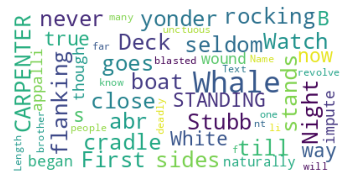


 FREQUENT 50 WORDS IN BOOK  : The Parent's Assistant



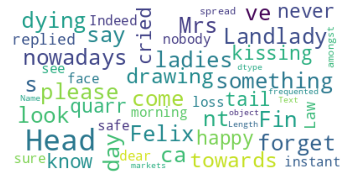


 FREQUENT 50 WORDS IN BOOK  : The Man Who Was Thursday



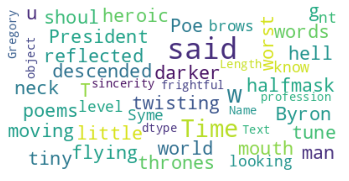


 FREQUENT 50 WORDS IN BOOK  : Emma



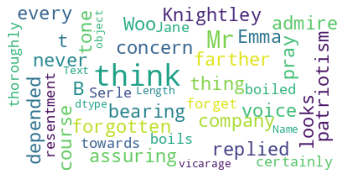


 FREQUENT 50 WORDS IN BOOK  : The Tragedie of Hamlet



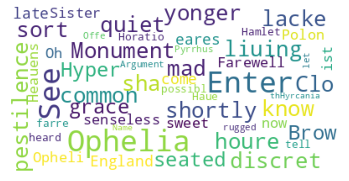

In [77]:
# plot word cloud for the most frequent 50 words in each book  
import wordcloud

for label in data['Book Name'].unique():
  books = data[data["Book Name"]==label]["Text"]

  #wordcloud 
  print(f"\n FREQUENT 50 WORDS IN BOOK  : {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=50, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

#

In [7]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [8]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Clustered data points for X_train

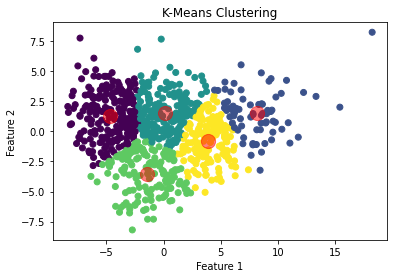

In [10]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

Unclustered Raw datapoints of data

Clustered data points for X_test

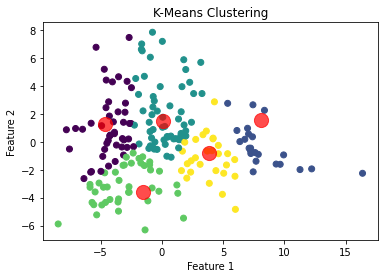

In [12]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMeans with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMeans with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMeans with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for KMeans with Bag of words is  0.3490241309793771
_________________________________________________________________________
kappa for KMeans with Bag of words is  -0.12756334799578717
_________________________________________________________________________
Coherence for KMeans with Bag of words is: 0.1242453214097853
_________________________________________________________________________


In [93]:
from collections import Counter
def cluster_count(pred):
  cls_count = Counter(pred)
  plt.bar(cls_count.keys(), cls_count.values())
  cluster_count(x_pca_test)

#EM (GAUSSIAN MIXTURE ) 

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

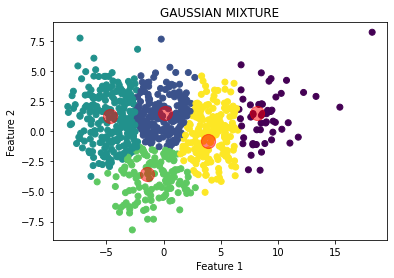

In [15]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

====UNCLUSTERED RAW DATA====


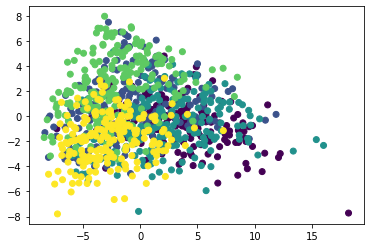

In [16]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


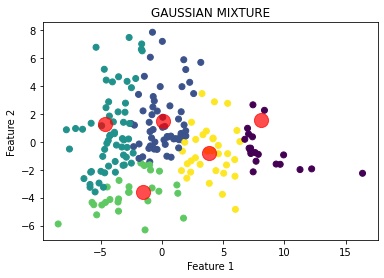

In [17]:
 print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('GAUSSIAN MIXTURE')
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for EM with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for EM with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for EM with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for EM with Bag of words is  0.34902342474593745
_________________________________________________________________________
kappa for EM with Bag of words is  -0.0007237939390125625
_________________________________________________________________________
Coherence for EM with Bag of words is: 0.09500088874950849
_________________________________________________________________________


#Heirarchial with Bag of words 


In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

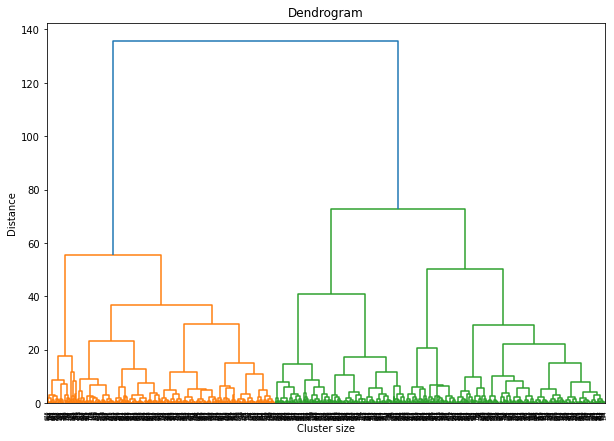

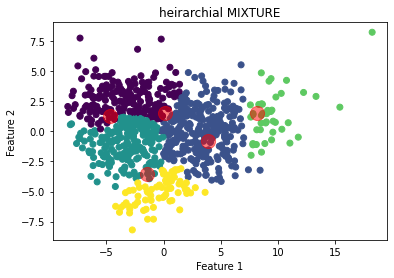

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)

# Print cluster labels
labels = agg.labels_

print("==============================================================================================")


# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("heirarchial MIXTURE")
plt.show()

====TEST DATA CLUSTER====


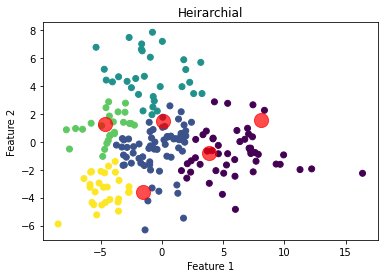

In [21]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Bag of words is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Bag of words is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Bag of words is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Bag of words is  0.3152067008301632
_________________________________________________________________________
kappa for Heirarchial with Bag of words is  0.19630804005902125
_________________________________________________________________________
Coherence for Heirarchial with Bag of words is: 0.11954155367955242
_________________________________________________________________________


#TF-IDF k-means


In [23]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['label'], test_size=0.2, random_state=42)

In [24]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

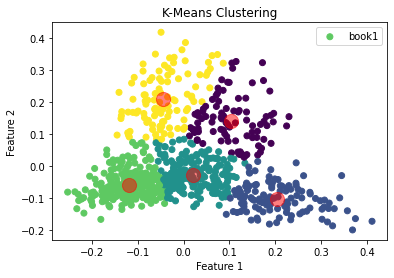

In [106]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.legend(["book1","book2","book3","book4","book5"])
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

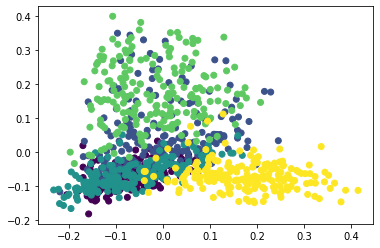

In [27]:
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

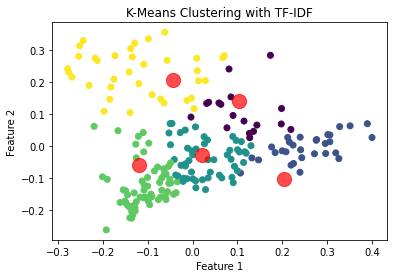

In [28]:
predicted_labels=kmeans.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with TF-IDF')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for KMEANS with TFIDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for KMEANS with TFIDF is ",kappa )
kktdf = kappa
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for KMEANS with TFIDF is:", ari)
print("_________________________________________________________________________")

Silhouette for KMEANS with TFIDF is  0.4179615901486654
_________________________________________________________________________
kappa for KMEANS with TFIDF is  -0.14906638356335478
_________________________________________________________________________
Coherence for KMEANS with TFIDF is: 0.23634259713377728
_________________________________________________________________________


#tfidf gmm


In [30]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

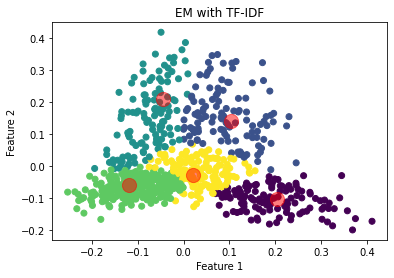

In [32]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF')
plt.show()

====UNCLUSTERED RAW DATA====


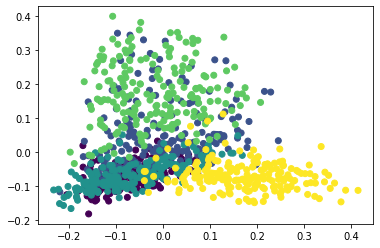

In [33]:
 print("====UNCLUSTERED RAW DATA====")
 data_vectorized=vectorizer.fit_transform(data['Text'])
 new_data_vectorized=data_vectorized.toarray()
 pca = PCA(n_components=2)
 X_pca_data=pca.fit_transform(new_data_vectorized)
 plt.scatter(X_pca_data[:, 0], X_pca_data[:, 1], c=data['label'])

====TEST DATA CLUSTER====


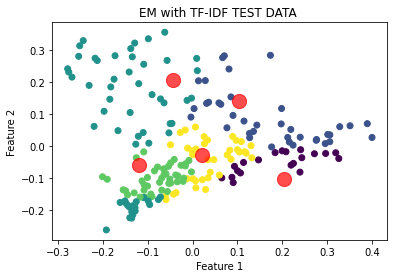

In [34]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with TF-IDF TEST DATA ')
plt.show()

In [35]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for GMM with TF-IDF is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for GMM with TF-IDF is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for GMM with TF-IDF is:", ari)
print("_________________________________________________________________________")

Silhouette for GMM with TF-IDF is  0.4179612108151314
_________________________________________________________________________
kappa for GMM with TF-IDF is  -0.10787719462961243
_________________________________________________________________________
Coherence for GMM with TF-IDF is: 0.1427678955648607
_________________________________________________________________________


#TFIDF HEIRARCHIAL 


In [36]:
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.fit_transform(X_test)
new_X_train=X_train_vectorized.toarray()
new_X_test = X_test_vectorized.toarray()

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

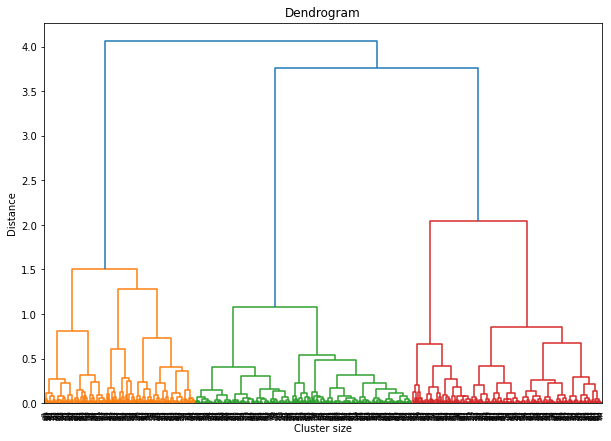

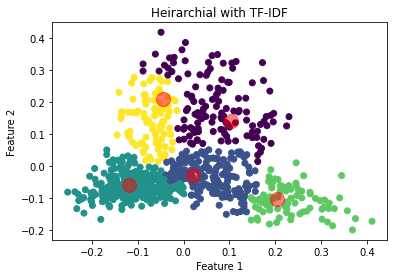

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca_train, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, orientation='top')
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Dendrogram")
plt.show()

# Agglomerative clustering with 5 clusters
n_clusters = 5
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(X_pca_train)

# Print cluster labels
labels = agg.labels_
agg.fit_predict(X_pca_test)
print("==============================================================================================")
 


# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with TF-IDF")
plt.show()

predicted_labels = agg.fit_predict(X_pca_test)

In [39]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with TF-IDF ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with TF-IDF ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with TF-IDF:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with TF-IDF  0.4055095992073565
_________________________________________________________________________
kappa for Heirarchial with TF-IDF  -0.06145251396648033
_________________________________________________________________________
Coherence for Heirarchial with TF-IDF: 0.24278548432183536
_________________________________________________________________________


#WORD EMBEDDING 

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

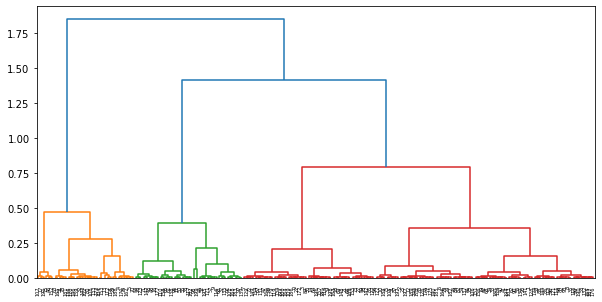

In [41]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("book_partitions.csv")



# Train word2vec model
sentences = [doc.split() for doc in X_train]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(doc_vectors)

sentences = [doc.split() for doc in X_test]
model = Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

# Get document vectors
doc_vectors = []
for doc in sentences:
    vecs = [model.wv[word] for word in doc if word in model.wv]
    if vecs:
        doc_vectors.append(np.mean(vecs, axis=0))
    else:
        doc_vectors.append(np.zeros((100,)))

X_pca_test = pca.fit_transform(doc_vectors)


# Cluster with k-means
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)
kmeans_labels = kmeans.labels_
km_predicted_labels = kmeans.predict(X_pca_test)

# Cluster with Gaussian mixture
gmm = GaussianMixture(n_components=5, random_state=0).fit(X_pca_train)
gmm_labels = gmm.predict(X_pca_train)
gmm_predicted_labels = gmm.predict(X_pca_test)

# Cluster with hierarchical clustering
Z = linkage(doc_vectors, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()



In [42]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, kmeans_labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, km_predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, km_predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  0.3503251708113112
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  0.15929203539823
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.056359160079404697
_________________________________________________________________________


In [43]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_pca_train, labels)
print("Silhouette for Heirarchial with Word2VEC is ",silhouette )
print("_________________________________________________________________________")

from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, predicted_labels)
print("kappa for Heirarchial with Word2VEC is ",kappa )
print("_________________________________________________________________________")


from sklearn.metrics.cluster import adjusted_rand_score
ari = adjusted_rand_score(y_test, predicted_labels)
print("Coherence for Heirarchial with Word2VEC is:", ari)
print("_________________________________________________________________________")

Silhouette for Heirarchial with Word2VEC is  -0.06297386876266459
_________________________________________________________________________
kappa for Heirarchial with Word2VEC is  -0.06145251396648033
_________________________________________________________________________
Coherence for Heirarchial with Word2VEC is: 0.24278548432183536
_________________________________________________________________________


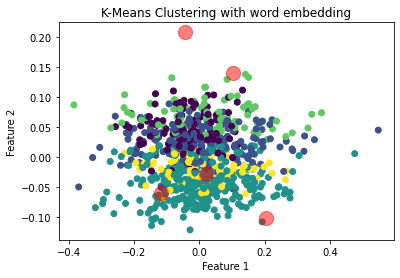

In [44]:

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with word embedding')
plt.show()

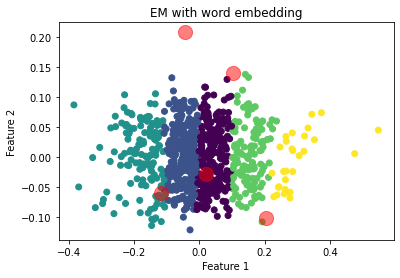

In [45]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with word embedding')
plt.show()

====TEST DATA CLUSTER====


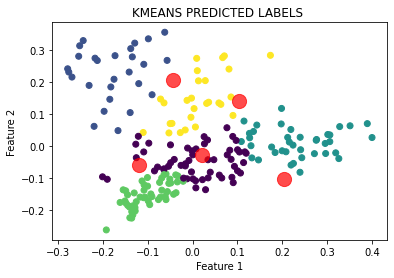

In [98]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMEANS PREDICTED LABELS ')
plt.show()


====TEST DATA CLUSTER====


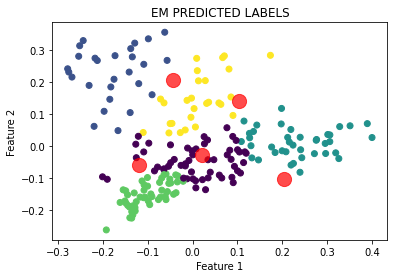

In [97]:
print("====TEST DATA CLUSTER====")
predicted_labels=gmm.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM PREDICTED LABELS')
plt.show()

#LDA 

In [48]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np
import pandas as pd

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(new_X_train)
X_pca_test = pca.fit_transform(new_X_test)

Coherence K-means with LDA: 0.5932578331180118
Coherence GMM with LDA: 0.29151417351066883
Coherence Hierarchical with LDA: 0.5211702823921293
______________________________________________________________________________________
Kappa K-means with LDA: -0.10250000000000004
Kappa GMM with LDA: -0.10250000000000004
Kappa Hierarchical with LDA : 0.01749999999999996
______________________________________________________________________________________
Silhouette K-means with LDA: 0.5932578331180118
Silhouette GMM with LDA: 0.29151417351066883
Silhouette Hierarchical with LDA: 0.5211702823921293
______________________________________________________________________________________


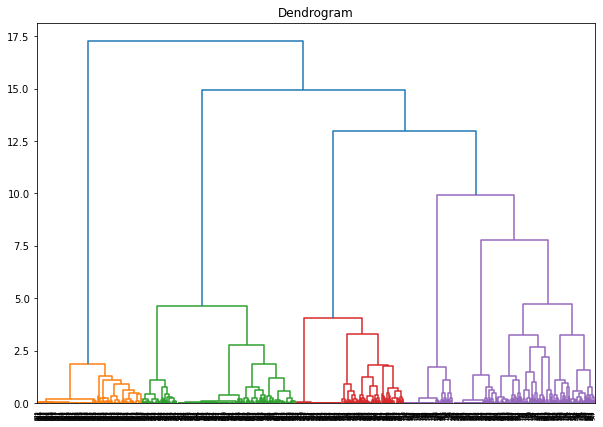

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transform to topics
topics = lda.transform(bow)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
#kmeans.predict()
# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = dendrogram(linkage(topics, method='ward'))

# Calculate coherence
coherence_kmeans = silhouette_score(topics, kmeans.labels_)
coherence_gmm = silhouette_score(topics, gmm.predict(topics))
coherence_agg = silhouette_score(topics, agg.labels_)

# Calculate kappa
true_labels = df['Author'].astype('category').cat.codes
kappa_kmeans = cohen_kappa_score(true_labels, kmeans.labels_)
kappa_gmm = cohen_kappa_score(true_labels, gmm.predict(topics))
kappa_agg = cohen_kappa_score(true_labels, agg.labels_)

# Calculate silhouette
silhouette_kmeans = silhouette_score(topics, kmeans.labels_)
silhouette_gmm = silhouette_score(topics, gmm.predict(topics))
silhouette_agg = silhouette_score(topics, agg.labels_)

# Print the results
print("Coherence K-means with LDA:", coherence_kmeans)
print("Coherence GMM with LDA:", coherence_gmm)
print("Coherence Hierarchical with LDA:", coherence_agg)
print("______________________________________________________________________________________")
print("Kappa K-means with LDA:", kappa_kmeans)
print("Kappa GMM with LDA:", kappa_gmm)
print("Kappa Hierarchical with LDA :", kappa_agg)
print("______________________________________________________________________________________")
print("Silhouette K-means with LDA:", silhouette_kmeans)
print("Silhouette GMM with LDA:", silhouette_gmm)
print("Silhouette Hierarchical with LDA:", silhouette_agg)
print("______________________________________________________________________________________")




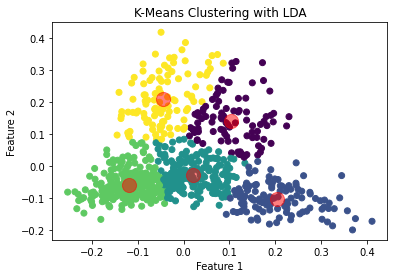

In [51]:
import matplotlib.pyplot as plt
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca_train)

# Get the predicted cluster labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering with LDA')
plt.show()

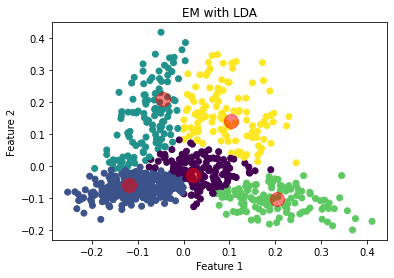

In [52]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(X_pca_train)

# Get the predicted cluster labels
gmm_labels = gmm.predict(X_pca_train)

# Plot the predicted clusters on a scatter plot
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=gmm_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM with LDA')
plt.show()

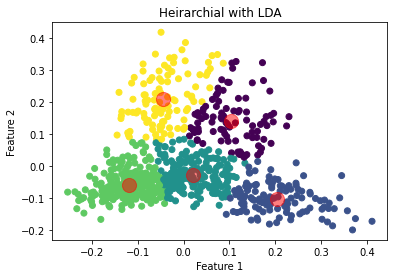

In [53]:
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Heirarchial with LDA")
plt.show()

====TEST DATA CLUSTER====


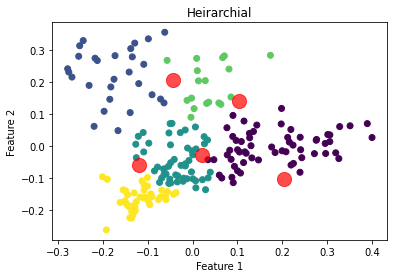

In [95]:
print("====TEST DATA CLUSTER====")
predicted_labels=agg.fit_predict(X_pca_test)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=predicted_labels)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Heirarchial')
plt.show()

#ERROR ANALYSIS 

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score, cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('book_partitions.csv')

# Convert the text to bag of words
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
bow = vectorizer.fit_transform(df['Text'])

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit_transform(bow)

# Transform to topics
topics = lda.transform(bow)

# Run K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(topics)
#kmeans.predict()
# Run Gaussian Mixture Model clustering algorithm
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(topics)

# Run Hierarchical clustering algorithm
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
agg.fit(topics)



AgglomerativeClustering(n_clusters=5)

In [64]:
data['label']=0
data['label'][200:400]=1
data['label'][400:600]=2
data['label'][600:800]=3
data['label'][800:1000]=4

<ipython-input-64-f510ee5b3d00>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-f510ee5b3d00>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-f510ee5b3d00>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-64-f510ee5b3d00>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [65]:
df['actual_label']=data['label']
df['predicted_label']=kmeans.labels_

In [66]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count']:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions :",count)

The number of wrong predictions : 263


In [72]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:200]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for Moby Dick:",count)

The number of wrong predictions for Moby Dick: 121


In [79]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:400]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for The Parent's Assistant:",count)

The number of wrong predictions for The Parent's Assistant: 125


In [82]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:600]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for The Man Who Was Thursday:",count)

The number of wrong predictions for The Man Who Was Thursday: 240


In [83]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:800]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for the book EMMA :",count)

The number of wrong predictions for the book EMMA : 263


In [107]:
df['Count']=df['predicted_label'] == df['actual_label']
count=0
for i in df['Count'][:1000]:
  if i ==True:
    count=count+1
df.drop(labels=['Count'],axis=1,inplace=True)
print("The number of wrong predictions for the book The Tragedy of Hamlet :",count)

The number of wrong predictions for the book The Tragedy of Hamlet : 263



 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : Moby Dick



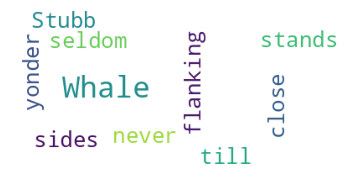


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Parent's Assistant



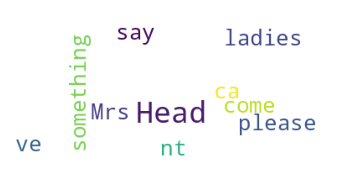


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Man Who Was Thursday



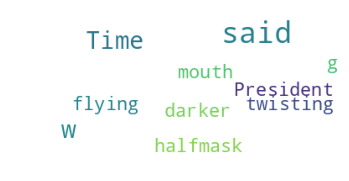


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : Emma



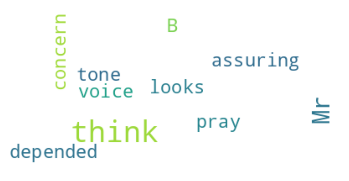


 WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : The Tragedie of Hamlet



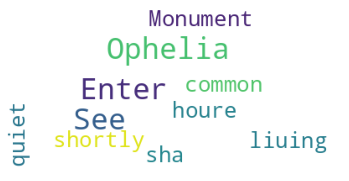

In [78]:
#plotting the words that threw our machine off 
import wordcloud

for label in data['Book Name'].unique():
  books = data[data["Book Name"]==label]["Text"]

  #wordcloud 
  print(f"\n WORDS THAT THREW OUR MODEL OFF IN THE BOOK OF : {label}\n")
  wc = wordcloud.WordCloud(background_color='white', max_words=10, 
                          max_font_size=35)
  wc = wc.generate(str(books))
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

In [90]:

from collections import Counter
def cluster_count(pred):
  cls_count = Counter(pred)
  plt.bar(cls_count.keys(), cls_count.values())
  cluster_count(x_pca_test)

In [92]:
cluster_count(x_pca_test)

NameError: ignored